In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
data = pd.read_csv('loan.csv')

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
data.drop('Loan_ID',axis=1,inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 56.2+ KB


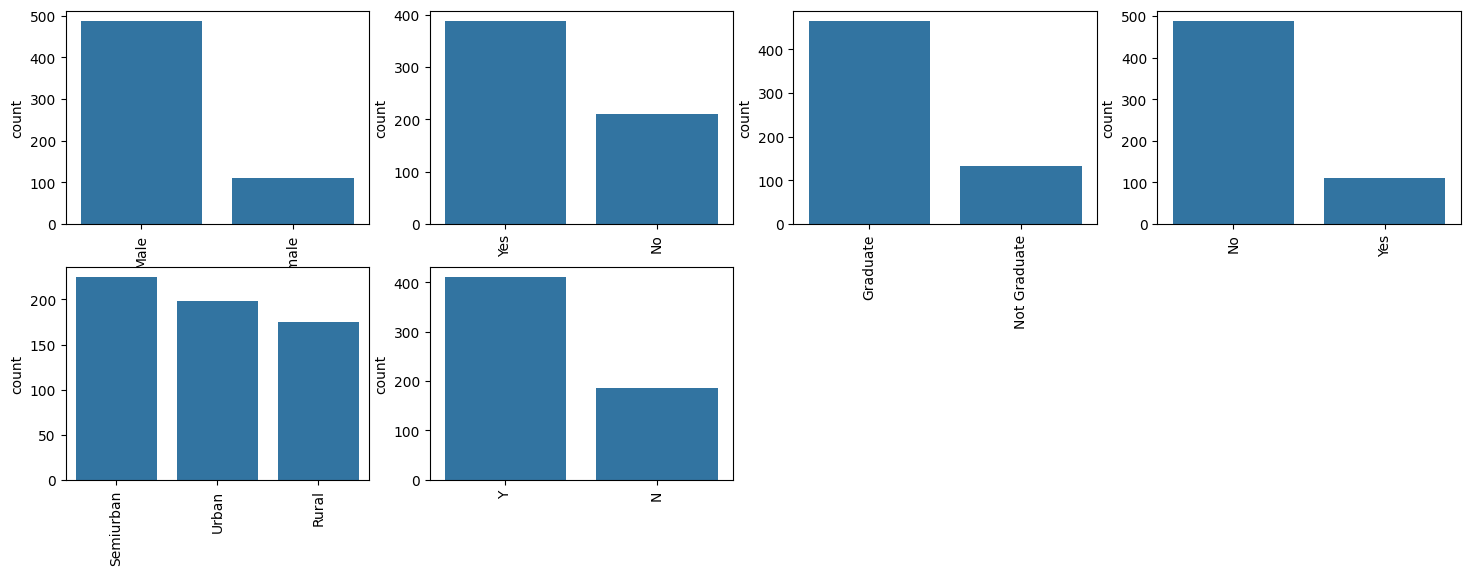

In [22]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.close()
plt.figure(figsize=(18,36))
index = 1
for col in object_cols:
    y = data[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y)
    index += 1

In [25]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
    data[col] = label_encoder.fit_transform(data[col])


In [26]:
data.head(9)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0.0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3.0,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,2.0,0,0,4006,1526.0,168.0,360.0,1.0,2,1


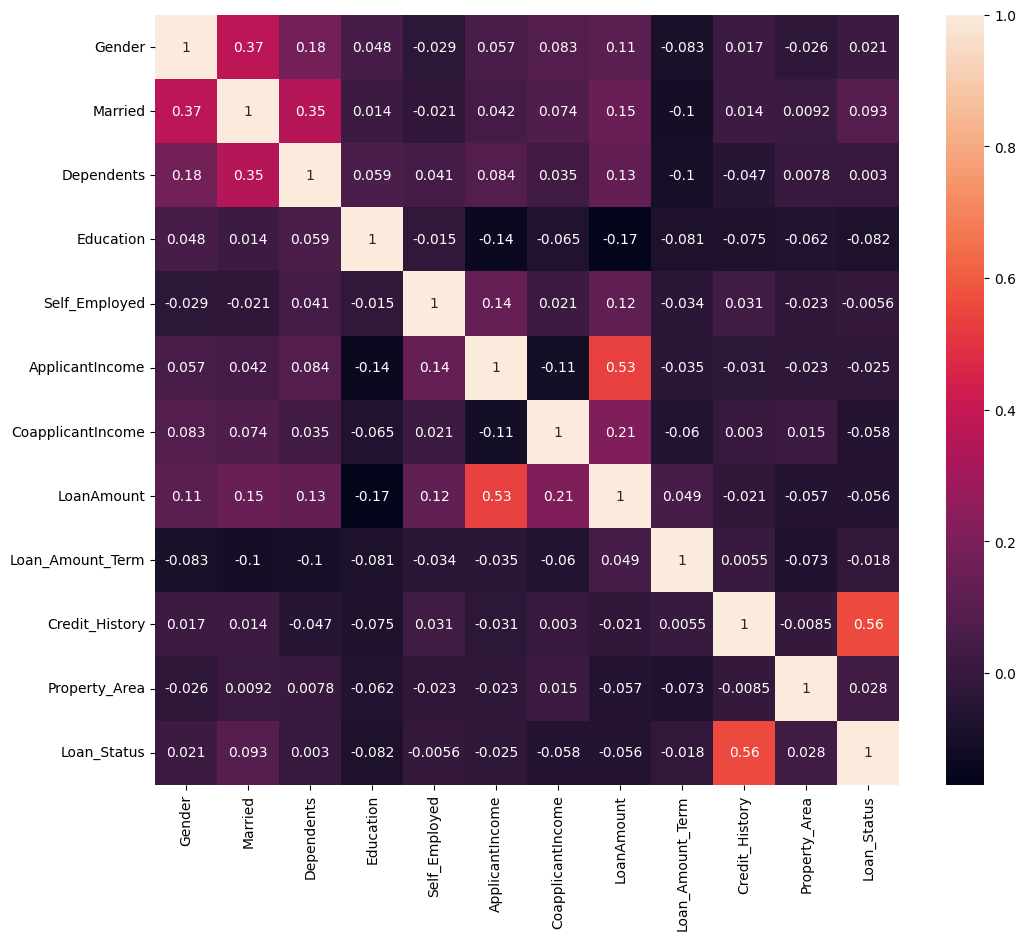

In [29]:
plt.close()
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [30]:
data.isna().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [34]:
X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']

X_train ,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size =0.2,random_state=42
)
print(X_train.shape,Y_test.shape)


(598, 11) (598,)
(478, 11) (120,)


In [56]:
model = LogisticRegression()
model.max_iter = 1000
model.fit(X_train,Y_train)

out = model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, out) * 100
roc_auc_score_train = metrics.roc_auc_score(Y_train,model.predict_proba(X_train)[:,1])
roc_auc_score_test = metrics.roc_auc_score(Y_test,model.predict_proba(X_test)[:,1])

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print('roc_auc_score_train')
print(roc_auc_score_train)
print('roc_auc_score_test')
print(roc_auc_score_test)


Accuracy: 82.5000
roc_auc_score_train
0.7794236357765578
roc_auc_score_test
0.6810084033613446


c:\Users\Alireza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
model = DecisionTreeClassifier()
model.max_iter = 100000
model.fit(X_train,Y_train)

out = model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, out) * 100
roc_auc_score_train = metrics.roc_auc_score(Y_train,model.predict_proba(X_train)[:,1])
roc_auc_score_test = metrics.roc_auc_score(Y_test,model.predict_proba(X_test)[:,1])



# Print the results
print(f'Accuracy: {accuracy:.4f}')
print('roc_auc_score_train')
print(roc_auc_score_train)
print('roc_auc_score_test')
print(roc_auc_score_test)

Accuracy: 68.3333
roc_auc_score_train
1.0
roc_auc_score_test
0.6336134453781512


In [47]:
model = KNeighborsClassifier()
model.fit(X_train,Y_train)

out = model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, out) * 100
roc_auc_score_train = metrics.roc_auc_score(Y_train,model.predict_proba(X_train)[:,1])
roc_auc_score_test = metrics.roc_auc_score(Y_test,model.predict_proba(X_test)[:,1])



# Print the results
print(f'Accuracy: {accuracy:.4f}')
print('roc_auc_score_train')
print(roc_auc_score_train)
print('roc_auc_score_test')
print(roc_auc_score_test)

Accuracy: 70.8333
roc_auc_score_train
0.7324426864707781
roc_auc_score_test
0.633109243697479
